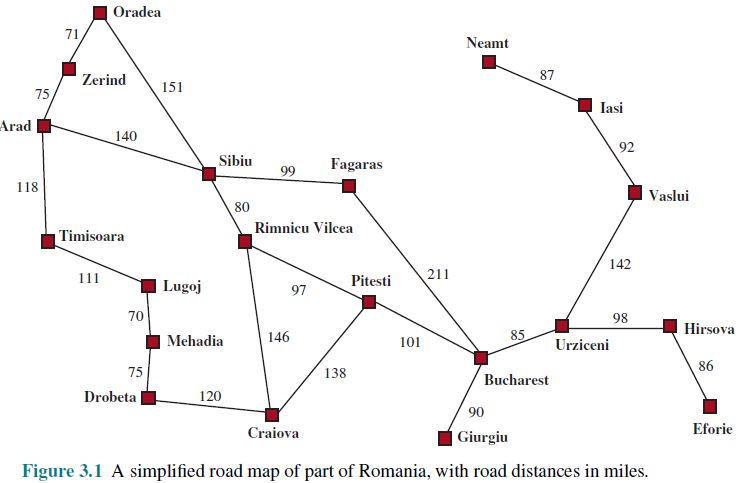

In [1]:
romanian_map = {
    'Arad': {'Sibiu':140, 'Zerind':75, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

# Uniform Cost Search

In [2]:
from queue import PriorityQueue


def ucs(startingNode, destinationNode):
    expanded = [] # to store expanded nodes
    frontier = PriorityQueue()

    snode = (0,startingNode,[startingNode]) #(g(n) = path cost, city name, path)
    frontier.put(snode)
    
    while not frontier.empty():
        unode = frontier.get() # select a node for expansion
        u = unode[1] 
        if u == destinationNode:# goal test            
            print(unode)
            print(expanded)
            return unode[2] # path
        expanded.append(u)
        for v in romanian_map[u].keys():#expanding            
            if v not in expanded:
                cost = unode[0] + romanian_map[u][v]
                path = unode[2] + [v]
                frontier.put((cost,v,path))
                print(v+ ", Cost: " +str(cost))
    print('Failed')

In [3]:
ucs('Arad', 'Bucharest') # change source and destination

Sibiu, Cost: 140
Zerind, Cost: 75
Timisoara, Cost: 118
Oradea, Cost: 146
Lugoj, Cost: 229
Oradea, Cost: 291
Fagaras, Cost: 239
Rimnicu, Cost: 220
Craiova, Cost: 366
Pitesti, Cost: 317
Mehadia, Cost: 299
Bucharest, Cost: 450
Drobeta, Cost: 374
Craiova, Cost: 455
Bucharest, Cost: 418
Drobeta, Cost: 486
(418, 'Bucharest', ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'])
['Arad', 'Zerind', 'Timisoara', 'Sibiu', 'Oradea', 'Rimnicu', 'Lugoj', 'Fagaras', 'Oradea', 'Mehadia', 'Pitesti', 'Craiova', 'Drobeta']


['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']

# insert simulation of the ouput!




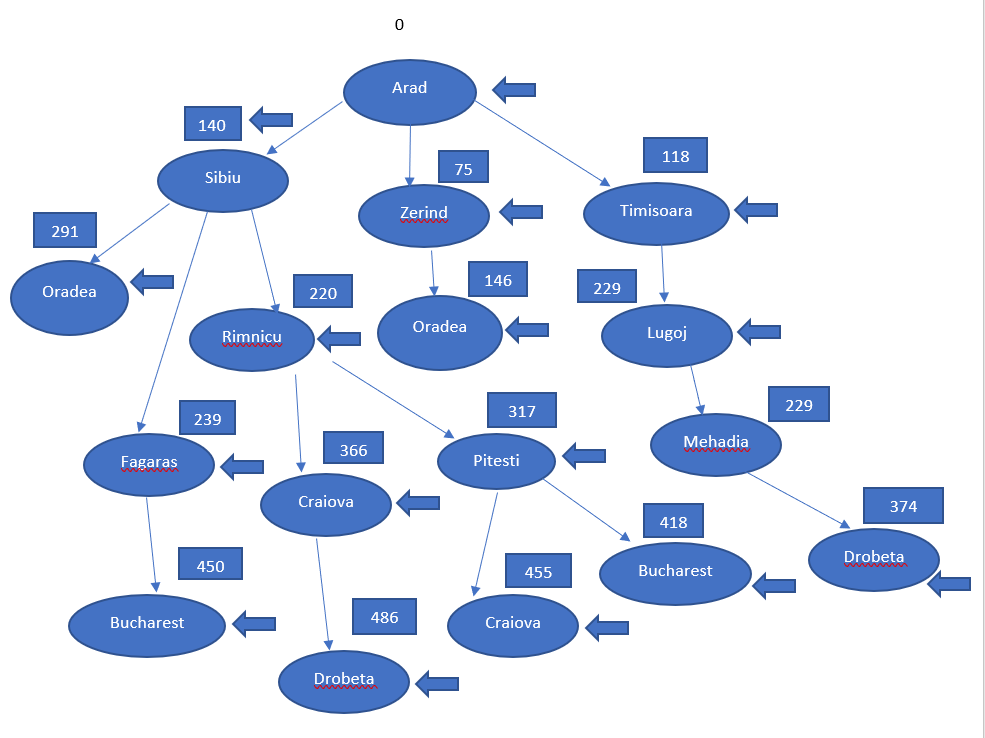

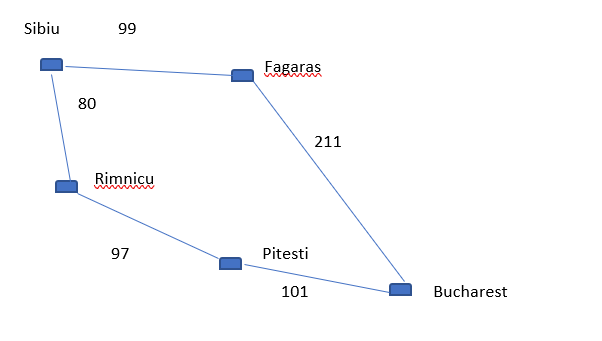

# Greedy Best First Search

In [13]:
# SLD heuristic for the destination (Bucharest)
h = {'Arad': 366,'Zerind':  374,'Oradea': 380,'Sibiu': 253,
    'Timisoara': 329,'Lugoj': 244,'Mehadia': 241,'Drobeta': 242,
    'Craiova': 160,'Rimnicu': 193,'Fagaras': 176,'Pitesti': 100,
    'Bucharest': 0,'Giurgiu': 77,'Urziceni': 80,'Hirsova': 151,
    'Eforie': 161,'Vaslui': 199,'Iasi': 226,'Neamt': 234
} 

In [11]:
from queue import PriorityQueue

def gbfs(startingNode, destinationNode):
    expanded = [] # to store expanded nodes
    frontier = PriorityQueue()

    snode = (h[startingNode],startingNode,[startingNode],0) # (h, city, path, path cost)
    frontier.put(snode)

    while not frontier.empty():
        unode = frontier.get() 
        u = unode[1]
        
        if u== destinationNode:#Goal Test            
            print(unode)
            print(expanded)
            return unode[2] #path
        expanded.append(u)
        for v in romanian_map[u].keys():            
            if v not in expanded:
                cost = unode[3] + romanian_map[u][v]
                path = unode[2]+[v]
                frontier.put((h[v],v,path, cost))   
    print('Failed')

In [14]:
gbfs('Arad', 'Bucharest') # change source only

(0, 'Bucharest', ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'], 450)
['Arad', 'Sibiu', 'Fagaras']


['Arad', 'Sibiu', 'Fagaras', 'Bucharest']

# insert simulation of the ouput!

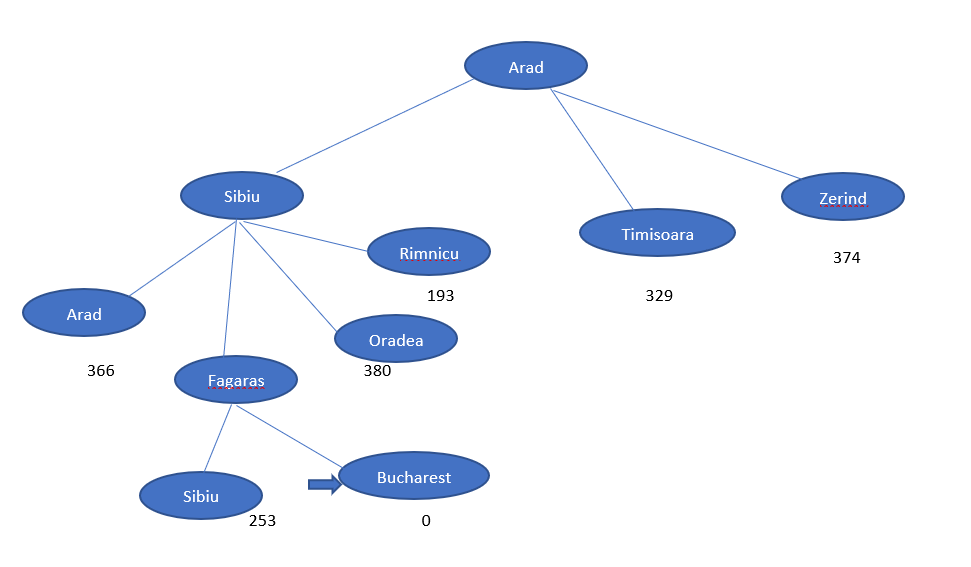

# A*

In [4]:
# code A* here

class Queue:

    def __init__(self, pop_index=0):
        self.queue = []
        self.pop_index = pop_index

    def append(self, item):
        self.queue.append(item)

    def sortAppend(self, item, f):
        self.queue.append(item)
        self.queue.sort(key=f)

    def extend(self, items):
        self.queue.extend(items)

    def pop(self):
        if len(self.queue) > 0:
            return self.queue.pop(self.pop_index)
        else:
            raise Exception('FIFOQueue is empty')

    def printQueue(self):
        print("Frontier Status After Adding .............")
        print([items.state for items in self.queue])

    def __len__(self):
        return len(self.queue)

    def __contains__(self, item):
        return item in self.queue


graph = {
    'Oradea': {'Sibiu': 151, 'Zerind': 71},
    'Zerind': {'Arad': 75},
    'Arad': {'Sibiu': 140, 'Timisoara': 118},
    'Timisoara': {'Lugos': 111},
    'Lugos': {'Mehadia': 70},
    'Mehadia': {'Drobeta': 75},
    'Drobeta': {'Craiova': 120},
    'Sibiu': {'RimnicuVilcea': 80, 'Fagaras': 99},
    'RimnicuVilcea': {'Craiova': 146, 'Pitesti': 97},
    'Pitesti': {'Craiova': 138, 'Bucarest': 101},
    'Fagaras': {'Bucarest': 211},
    'Bucarest': {'Giurgiu': 90, 'Urziceni': 85},
    'Urziceni': {'Vaslui': 142, 'Hirsova': 98},
    'Hirsova': {'Eforie': 86},
    'Vaslui': {'Iasi': 92},
    'Iasi': {'Neamt': 87}
}


class graphProblem:

    def __init__(self, initial, goal, graph):
        self.initial = initial
        self.goal = goal
        self.graph = graph

    def actions(self, state):
        return list(self.graph[state].keys())

    def result(self, state, action):
        return action

    def goal_test(self, state):
        return state == self.goal

    def path_cost(self, cost_so_far, state1, action, state2):
        return cost_so_far + self.graph[state1][state2]


class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    def expand(self, graphProblem):
        return [self.child_node(graphProblem, action)
                for action in graphProblem.actions(self.state)]

    def child_node(self, graphProblem, action):
        next_state = graphProblem.result(self.state, action)
        return Node(next_state, self, action,
                    graphProblem.path_cost(self.path_cost, self.state, action, next_state))

    def path(self):
        node, path_back = self, []

        while node:
            path_back.append(node)
            node = node.parent

        return list(reversed(path_back))

    def solution(self):
        return [node.action for node in self.path()[1:]]


def graph_search(problem, pop_index):
    node = Node(problem.initial)

    if problem.goal_test(node.state): return node

    frontier = Queue(pop_index)

    explored = set()

    frontier.append(node)

    while frontier:

        frontier.printQueue()
        node = frontier.pop()

        print("Parent: ", node.state,
              "Childs: ", [child.state for child in node.expand(problem)])

        explored.add(node.state)

        for child in node.expand(problem):
            if problem.goal_test(child.state): return child
            if child.state not in explored and child not in frontier: frontier.append(child)

    return None


gp = graphProblem("Oradea", "Bucarest", graph)

heuristicSLD = {
    'Arad': 366,
    'Bucarest': 0,
    'Craiova': 160,
    'Drobeta': 242,
    'Eforie': 161,
    'Fagaras': 176,
    'Giurgiu': 77,
    'Hirsova': 151,
    'Iasi': 226,
    'Lugos': 244,
    'Mehadia': 241,
    'Neamt': 234,
    'Oradea': 380,
    'Pitesti': 100,
    'RimnicuVilcea': 193,
    'Sibiu': 253,
    'Timisoara': 329,
    'Urziceni': 80,
    'Vaslui': 199,
    'Zerind': 374
}



def aStar_search(problem):
    return best_first_search(problem, lambda node: node.path_cost + heuristicSLD[node.state])


print("__________A* State Space_______________")

goalNode = aStar_search(gp)
print("Result:", goalNode.solution())
print("Path Cost: ", goalNode.path_cost)

__________A* State Space_______________
Frontier Status After Adding .............
['Oradea']
Frontier Status After Adding .............
['Sibiu', 'Zerind']
Frontier Status After Adding .............
['RimnicuVilcea', 'Fagaras', 'Zerind']
Frontier Status After Adding .............
['Fagaras', 'Pitesti', 'Zerind', 'Craiova']
Frontier Status After Adding .............
['Pitesti', 'Zerind', 'Bucarest', 'Craiova']
Frontier Status After Adding .............
['Bucarest', 'Zerind', 'Bucarest', 'Craiova', 'Craiova']
Result: ['Sibiu', 'RimnicuVilcea', 'Pitesti', 'Bucarest']
Path Cost:  429


# insert simulation of the ouput

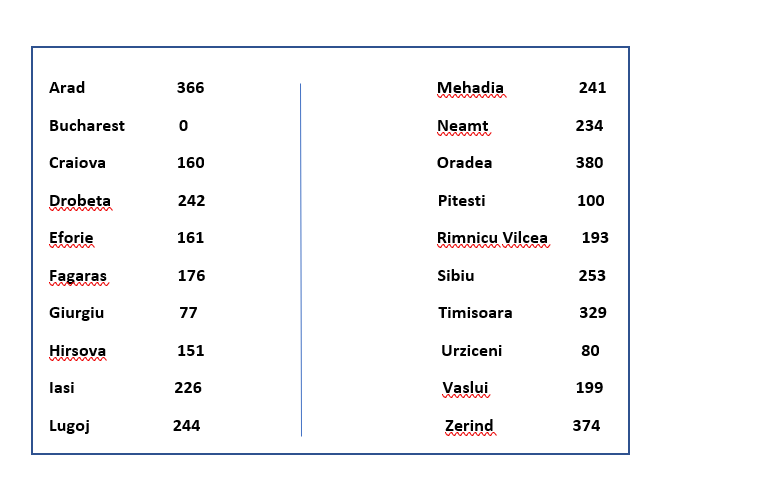

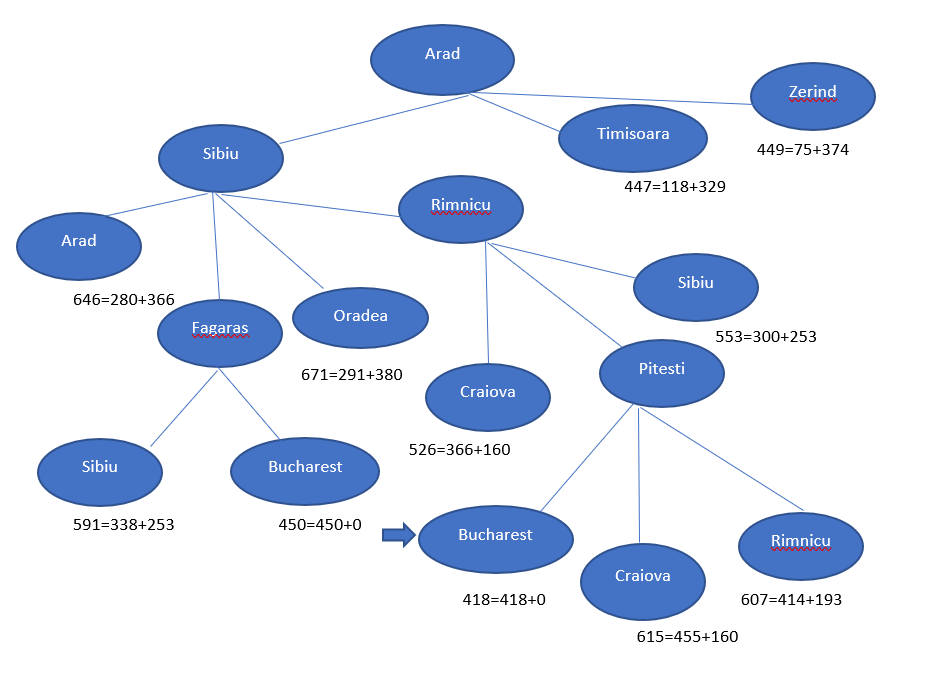